# COVID mortality data by UK region

### The following workbook shows the processing, visualisation & analysis of the COVID mortality data.

# Data Cleaning & Pre-Processing

## 1. Importing required libraries & modules for the cleaning and visualisation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os
import gc
from PIL import Image as img
import glob
from IPython.display import Image

## 2. Loading the data 
The data was obtained from the UKHSA API and saved to a sql database. I therefore load the data for processing using sqlalchemy.

In [2]:
covid_deaths_df = pd.read_csv('1_api_connectors_and_csv_parsers/2_processed_databases/ukhsa_mortality_data/government_office_region_covid_19_deaths_onsbyday.csv')

## 3. Inspecting the data

### Displaying the head & tail of dataframe

You can see there are several redundancies in the dataframe. The theme, sub_theme, topic, geography_type, metric_group, stratum, sex, age and in_reporting_delay_period appear to be the same. They are likely redundant columns which will need addressing. 

I would also like to reshape the data. I would like the data to be ordered by date as the index with the column specifying the area and the data to be cumulative to facilitate a time series analysis of cumulative deaths over time.

In [3]:
covid_deaths_df.head

<bound method NDFrame.head of                     theme    sub_theme     topic            geography_type  \
0      infectious_disease  respiratory  COVID-19  Government Office Region   
1      infectious_disease  respiratory  COVID-19  Government Office Region   
2      infectious_disease  respiratory  COVID-19  Government Office Region   
3      infectious_disease  respiratory  COVID-19  Government Office Region   
4      infectious_disease  respiratory  COVID-19  Government Office Region   
...                   ...          ...       ...                       ...   
12991  infectious_disease  respiratory  COVID-19  Government Office Region   
12992  infectious_disease  respiratory  COVID-19  Government Office Region   
12993  infectious_disease  respiratory  COVID-19  Government Office Region   
12994  infectious_disease  respiratory  COVID-19  Government Office Region   
12995  infectious_disease  respiratory  COVID-19  Government Office Region   

                      geography g

In [4]:
covid_deaths_df.tail

<bound method NDFrame.tail of                     theme    sub_theme     topic            geography_type  \
0      infectious_disease  respiratory  COVID-19  Government Office Region   
1      infectious_disease  respiratory  COVID-19  Government Office Region   
2      infectious_disease  respiratory  COVID-19  Government Office Region   
3      infectious_disease  respiratory  COVID-19  Government Office Region   
4      infectious_disease  respiratory  COVID-19  Government Office Region   
...                   ...          ...       ...                       ...   
12991  infectious_disease  respiratory  COVID-19  Government Office Region   
12992  infectious_disease  respiratory  COVID-19  Government Office Region   
12993  infectious_disease  respiratory  COVID-19  Government Office Region   
12994  infectious_disease  respiratory  COVID-19  Government Office Region   
12995  infectious_disease  respiratory  COVID-19  Government Office Region   

                      geography g

In [5]:
covid_deaths_df.sample(5)

,theme,sub_theme,topic,geography_type,geography,geography_code,metric,metric_group,stratum,sex,age,year,month,epiweek,date,metric_value,in_reporting_delay_period
5820,infectious_disease,respiratory,COVID-19,Government Office Region,North West,E12000002,COVID-19_deaths_ONSByDay,deaths,default,all,all,2020,3,11,2020-03-14,3.0,0
2097,infectious_disease,respiratory,COVID-19,Government Office Region,East of England,E12000006,COVID-19_deaths_ONSByDay,deaths,default,all,all,2021,11,45,2021-11-13,11.0,0
9698,infectious_disease,respiratory,COVID-19,Government Office Region,South West,E12000009,COVID-19_deaths_ONSByDay,deaths,default,all,all,2022,11,48,2022-11-29,3.0,0
5925,infectious_disease,respiratory,COVID-19,Government Office Region,North West,E12000002,COVID-19_deaths_ONSByDay,deaths,default,all,all,2020,6,26,2020-06-27,10.0,0
12798,infectious_disease,respiratory,COVID-19,Government Office Region,Yorkshire and The Humber,E12000003,COVID-19_deaths_ONSByDay,deaths,default,all,all,2023,6,26,2023-06-29,1.0,0


In [6]:
covid_deaths_df.shape

(12996, 17)

In [7]:
covid_deaths_df

,theme,sub_theme,topic,geography_type,geography,geography_code,metric,metric_group,stratum,sex,age,year,month,epiweek,date,metric_value,in_reporting_delay_period
0,infectious_disease,respiratory,COVID-19,Government Office Region,East Midlands,E12000004,COVID-19_deaths_ONSByDay,deaths,default,all,all,2020,1,5,2020-01-30,0.0,0
1,infectious_disease,respiratory,COVID-19,Government Office Region,East Midlands,E12000004,COVID-19_deaths_ONSByDay,deaths,default,all,all,2020,1,5,2020-01-31,0.0,0
2,infectious_disease,respiratory,COVID-19,Government Office Region,East Midlands,E12000004,COVID-19_deaths_ONSByDay,deaths,default,all,all,2020,2,5,2020-02-01,0.0,0
3,infectious_disease,respiratory,COVID-19,Government Office Region,East Midlands,E12000004,COVID-19_deaths_ONSByDay,deaths,default,all,all,2020,2,5,2020-02-02,0.0,0
4,infectious_disease,respiratory,COVID-19,Government Office Region,East Midlands,E12000004,COVID-19_deaths_ONSByDay,deaths,default,all,all,2020,2,6,2020-02-03,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12991,infectious_disease,respiratory,COVID-19,Government Office Region,Yorkshire and The Humber,E12000003,COVID-19_deaths_ONSByDay,deaths,default,all,all,2024,1,2,2024-01-08,1.0,0
12992,infectious_disease,respiratory,COVID-19,Government Office Region,Yorkshire and The Humber,E12000003,COVID-19_deaths_ONSByDay,deaths,default,all,all,2024,1,2,2024-01-09,2.0,0
12993,infectious_disease,respiratory,COVID-19,Government Office Region,Yorkshire and The Humber,E12000003,COVID-19_deaths_ONSByDay,deaths,default,all,all,2024,1,2,2024-01-10,1.0,0
12994,infectious_disease,respiratory,COVID-19,Government Office Region,Yorkshire and The Humber,E12000003,COVID-19_deaths_ONSByDay,deaths,default,all,all,2024,1,2,2024-01-11,0.0,0


### Using the pandas .info() method to see the columns, total entries and associated datatypes

As you can see there are 12996 entries in the dataframe.

In [8]:
covid_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12996 entries, 0 to 12995
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   theme                      12996 non-null  object 
 1   sub_theme                  12996 non-null  object 
 2   topic                      12996 non-null  object 
 3   geography_type             12996 non-null  object 
 4   geography                  12996 non-null  object 
 5   geography_code             12996 non-null  object 
 6   metric                     12996 non-null  object 
 7   metric_group               12996 non-null  object 
 8   stratum                    12996 non-null  object 
 9   sex                        12996 non-null  object 
 10  age                        12996 non-null  object 
 11  year                       12996 non-null  int64  
 12  month                      12996 non-null  int64  
 13  epiweek                    12996 non-null  int

### Using describe to see the statistics for numerical columns

In [9]:
covid_deaths_df['metric_value'].describe()

count    12996.000000
mean        15.309403
std         28.393523
min          0.000000
25%          3.000000
50%          7.000000
75%         14.000000
max        327.000000
Name: metric_value, dtype: float64

## 4.Handling Missing Data

Using the isnull function, you can see that the data has no null values therefore there is no need to handle the null data.

In [10]:
covid_deaths_df.isnull().sum()

theme                        0
sub_theme                    0
topic                        0
geography_type               0
geography                    0
geography_code               0
metric                       0
metric_group                 0
stratum                      0
sex                          0
age                          0
year                         0
month                        0
epiweek                      0
date                         0
metric_value                 0
in_reporting_delay_period    0
dtype: int64

This is seen visually below when I plot a missing data heatmap!

Text(0.5, 1.0, 'Missing Data Heatmap')

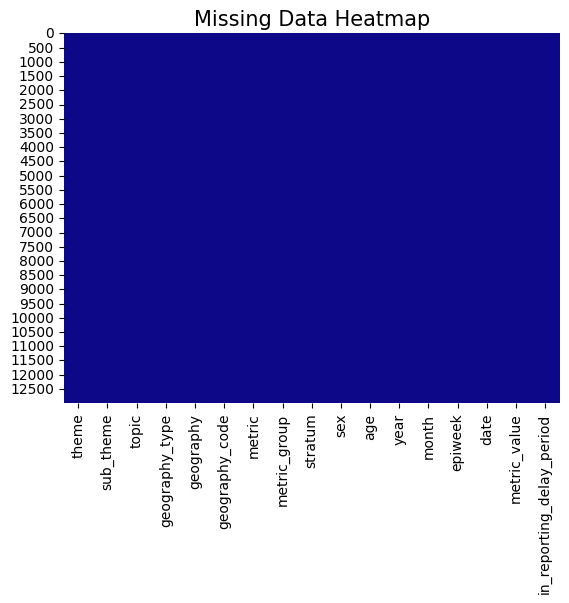

In [11]:
plt.figure()
sns.heatmap(covid_deaths_df.isnull(), cbar=False, cmap='plasma', annot=False)

plt.title('Missing Data Heatmap', fontsize=15)

## 5. Normalizing data types

As I want to plot a time series of cumulative mortality I need to ensure the datatypes of the metric_value and the date colum, ensuring the correct datatype will be essential for visualization. To do this I inspect the data type of the first element in each column.

In [12]:
type(covid_deaths_df['date'].iloc[0])

str

In [13]:
type(covid_deaths_df['metric_value'].iloc[0])

numpy.float64

As you can see, the metric_value is a number - it would be more appropriate to have this as an int however it is not essential. The date needs to be converted from a string to a datetime object.

In [14]:
covid_deaths_df['date'] = pd.to_datetime(covid_deaths_df['date'], format='%Y-%m-%d', errors='coerce')

In [15]:
covid_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12996 entries, 0 to 12995
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   theme                      12996 non-null  object        
 1   sub_theme                  12996 non-null  object        
 2   topic                      12996 non-null  object        
 3   geography_type             12996 non-null  object        
 4   geography                  12996 non-null  object        
 5   geography_code             12996 non-null  object        
 6   metric                     12996 non-null  object        
 7   metric_group               12996 non-null  object        
 8   stratum                    12996 non-null  object        
 9   sex                        12996 non-null  object        
 10  age                        12996 non-null  object        
 11  year                       12996 non-null  int64         
 12  mont

As you can see the date is now a datetime, perfect for time series analysis!

## 6. Remove Duplicates

In [16]:
covid_deaths_df.drop_duplicates(inplace=True)

## 7. Handling Unnecessary Data

In [17]:
threshold = 0.95

high_percentage_columns = []
percentages = []

for col in covid_deaths_df.columns:
    most_frequent_value_percentage = covid_deaths_df[col].value_counts(normalize=True).max()
    
    if most_frequent_value_percentage > threshold:
        high_percentage_columns.append(col)
        percentages.append(most_frequent_value_percentage)

print("Columns with high percentage of duplicates:")
for i, column in enumerate(high_percentage_columns):
    print(f"{column}: {percentages[i]}" )

Columns with high percentage of duplicates:
theme: 1.0
sub_theme: 1.0
topic: 1.0
geography_type: 1.0
metric: 1.0
metric_group: 1.0
stratum: 1.0
sex: 1.0
age: 1.0
in_reporting_delay_period: 1.0


### As predicted above the majority of columns contain only duplicates. 

#### I would like to drop them all, but first I will just confirm that the sex and age column are not necessary

In [18]:
covid_deaths_df['sex']

0        all
1        all
2        all
3        all
4        all
        ... 
12991    all
12992    all
12993    all
12994    all
12995    all
Name: sex, Length: 12996, dtype: object

In [19]:
covid_deaths_df['age']

0        all
1        all
2        all
3        all
4        all
        ... 
12991    all
12992    all
12993    all
12994    all
12995    all
Name: age, Length: 12996, dtype: object

In [20]:
high_percentage_columns

['theme',
 'sub_theme',
 'topic',
 'geography_type',
 'metric',
 'metric_group',
 'stratum',
 'sex',
 'age',
 'in_reporting_delay_period']

### I therefore will drop the columns with duplicate data.

In [21]:
covid_deaths_df.drop(columns=high_percentage_columns, inplace=True)

### Reviewing the changes

In [22]:
covid_deaths_df

,geography,geography_code,year,month,epiweek,date,metric_value
0,East Midlands,E12000004,2020,1,5,2020-01-30,0.0
1,East Midlands,E12000004,2020,1,5,2020-01-31,0.0
2,East Midlands,E12000004,2020,2,5,2020-02-01,0.0
3,East Midlands,E12000004,2020,2,5,2020-02-02,0.0
4,East Midlands,E12000004,2020,2,6,2020-02-03,0.0
...,...,...,...,...,...,...,...
12991,Yorkshire and The Humber,E12000003,2024,1,2,2024-01-08,1.0
12992,Yorkshire and The Humber,E12000003,2024,1,2,2024-01-09,2.0
12993,Yorkshire and The Humber,E12000003,2024,1,2,2024-01-10,1.0
12994,Yorkshire and The Humber,E12000003,2024,1,2,2024-01-11,0.0


### Saving the cleaned data for number of deaths per day by region

In [23]:
covid_deaths_df.to_csv(f"2_cleaned_files/ukhsa_mortality_data/uk_regional_covid_mortality_cleaned.csv", index=False)

## 8. Pivoting the data table and calculating cumulative

### I use the .pivot() method to pivot the table to show the deaths in each region for each date - this will aid with data analysis

In [24]:
pivoted_df = covid_deaths_df.pivot(index='date', columns='geography', values='metric_value')

In [25]:
pivoted_df

geography,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
date,,,,,,,,,
2020-01-30,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2024-01-08,3.0,0.0,3.0,1.0,6.0,2.0,3.0,2.0,1.0
2024-01-09,0.0,3.0,5.0,1.0,2.0,0.0,2.0,2.0,2.0
2024-01-10,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0


In [26]:
pivoted_df.to_csv(f"2_cleaned_files/ukhsa_mortality_data/uk_regional_covid_mortality_pivoted_cleaned.csv", index=True)

### I use the .cumsum() method to pivot the table to show the cumulative mortality for each date

In [27]:
cumulative_df = pivoted_df.cumsum()

In [28]:
cumulative_df.to_csv(f"2_cleaned_files/ukhsa_mortality_data/uk_regional_cumulative_mortality_cleaned.csv", index=True)